# 0. An end to end Scikit Learn workflow

various imports we are doing here:
- `from sklearn.ensemble import RandomForestClassifier`: used for classification problem like that of heart disease classification
- `from sklearn.ensemble import RandomForestRegressor`: used for regression problems like finding the price of a house/ bike etc.
- `from sklearn.model_selection import train_test_split` : to prepare the taining and the testing data set by splitting it randomly.
- `from sklearn.preprocessing import OneHotEncoder` : it is used to convert non-numerical columns to the numerical ones.
- `from sklearn.compose import ColumnTransformer` : together with the `OneHotEncoder` it is used to place the converted numerical columns in place.
- `from sklearn.metrics import classification_report, confusion_matrix, accuracy_score`
    1. **Classification Report:** it compares the lables `y_test` with the predictions `y_preds` which the models has made

In [1]:
# get the data ready
import pandas as pd
import numpy as np

**Step 1:** Getting the data ready

In [2]:
# Importing data from excel
heart_disease = pd.read_csv(r"..\Input_Files\heart-disease.csv")

# Splitting the data into Features and labels
# X is known as Feature Matrix and Y as labels
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

**Step 2:** Choosing the right estimator/algorithm for our problem

In [3]:
# This is selecting a particular model for our ML
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# This is the lisyt of all possible hyperparametres which are avaialble in RandomForestClassifier
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
len(X_train), len(X_test), len(heart_disease)

(242, 61, 303)

**Step 3:** Fitting the model and use it to make predictions

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Making a prediction
y_preds =  clf.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

**Step 4:** Evaluating a model.

In [8]:
# Checking on how good our model fit with the test data.
clf.score(X_train, y_train)

1.0

In [9]:
clf.score(X_test, y_test)

0.8360655737704918

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.85      0.90      0.88        39

    accuracy                           0.84        61
   macro avg       0.83      0.81      0.82        61
weighted avg       0.83      0.84      0.83        61



In [11]:
confusion_matrix(y_test, y_preds)

array([[16,  6],
       [ 4, 35]], dtype=int64)

In [12]:
accuracy_score(y_test, y_preds)

0.8360655737704918

**Step 5:** Improve a model, based on tuning the hyperparameters

In [13]:
# tring to 

np.random.seed(55)
for i in range(50, 150, 10):
    print(f"Trying to evaluate the model with {i} n_estomator...")
    clf_improve = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    
    # showing the output only for 2 decimal places (string formatting)
    print(f"Model accuracy on test set:{clf_improve.score(X_test, y_test) *100:.2f}%")
    
    # this to round it off 
    #print(f"Model accuracy on test set:{(clf_improve.score(X_test, y_test) *100).round()}%")

Trying to evaluate the model with 50 n_estomator...
Model accuracy on test set:81.97%
Trying to evaluate the model with 60 n_estomator...
Model accuracy on test set:86.89%
Trying to evaluate the model with 70 n_estomator...
Model accuracy on test set:83.61%
Trying to evaluate the model with 80 n_estomator...
Model accuracy on test set:85.25%
Trying to evaluate the model with 90 n_estomator...
Model accuracy on test set:83.61%
Trying to evaluate the model with 100 n_estomator...
Model accuracy on test set:83.61%
Trying to evaluate the model with 110 n_estomator...
Model accuracy on test set:83.61%
Trying to evaluate the model with 120 n_estomator...
Model accuracy on test set:83.61%
Trying to evaluate the model with 130 n_estomator...
Model accuracy on test set:85.25%
Trying to evaluate the model with 140 n_estomator...
Model accuracy on test set:86.89%


We can see that for the e_estimators value as 120 or 130 the model has scaored a maximum of 83.61%...

This is one of the many ways by which we can improve the model score.

**Step 6:** Save a model and load it..

In [14]:
import pickle

pickle.dump(clf_improve, open("ran_forest_class_model_test.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("ran_forest_class_model_test.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8688524590163934

### Steps to follow to insatll or update the version of apps like scikit learn 

we can open the conda teminal and type `conda list scikit-learn` to identify the version of SCikit Learn installed in our machines.

We can also trype `conda list` to get the lsit of all the elements installed in the conda environment.

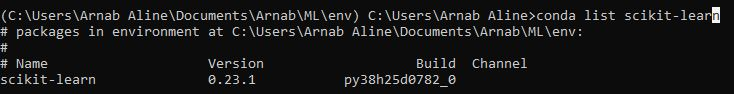

In [16]:
from IPython.display import Image
PATH = "..\\images\\"
Image(filename = PATH + "Installed version of Scikit Learn.JPG", width=800, height=800)

`conda search scikit-learn --info` this will giv ethe list of dependencises which are associated with a particular package.
So even if we plan to install or upgrade a particular component, we need to make sure that the dependencies are also in sync and updated to the desired level.

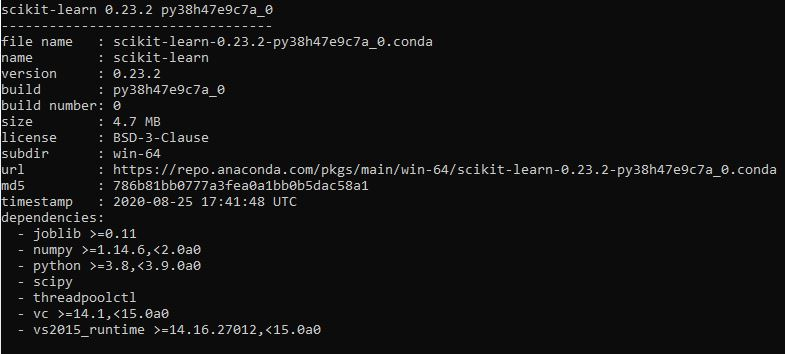

In [17]:
Image(filename = PATH + "Scikit Learn dependency.JPG", width=800, height=800)

`conda uninstall python scikit-learn` this will uninstall the python and scikit-learn  and the other dependent packages with it. 
for example if w euninstall Python it will automatically uninstall the `Pandas` and `Numpy` and `matplot Lib` as they are all dependent objects.

`conda install python=3.7.1 scikit-learn=0.22` in this way we specify the particular version of the objects which we want to install.

`conda update scikit-learn` will update the package to the latest version provided the correct dependencies are installled for it. But it is always best to check the vesrion dependencises by `conda search scikit-learn --info` before installing or updating it.

## 1. Getting the data ready

We generally do 3 things here:
- split the data into features and labels (`X` and `y`) and then splitting the data into training and test sets
- Converting non-numerical values into numerical ones (also known as **Featured Encoding**)
    - using `OneHotEncoder` and `ColumnTransformer`.
    - using Pandas `get_dummies` method.
- Filling the missing values in the dataset (also known as **Imputing**)
    - By

### 1.1 Split the data into features and labels (`X` and `y`) and then splitting the data into training and test sets

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

### 1.2 Converting non-numerical values into numerical ones (also known as Featured Encoding)

In [22]:
car_sales_extended = pd.read_csv("..\Input_Files\car-sales-extended.csv")
len(car_sales_extended)

1000

In [23]:
# split into X and y
X = car_sales_extended.drop("Price", axis=1)
y = car_sales_extended["Price"]

# split into train and test set data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


if we keep the String columns as is and without converting them to numerical ones, then we will get the **Value Error** 
as mentioning `could not convert String to Float`.

So it is must to convert the Strings to float for the ML algorithm to work upon.

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("any_name",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


as in the dataset we have few unique vales as 
- cars = Toyota, Honda, BMW and Nissan  ==> total 4
- Colour = red, white, blue, black and green  ==> total 5
- doors = 3,4,5 ==> total 3

The sum value is 12 (4+5+3)... thats the reasonwe are having 12 combitation column in the above set from `0` to `11`

In [25]:
dummies = pd.get_dummies(car_sales_extended[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


it is the same thing as that of above but as the doors column is numerical already, so it didnt put it back as categorical

### 1.3 Filling the missing values in the dataset (also known as Imputing)
There are two ways to do it:
    - Fill them with some values (also known as **Imputing**)... In this process there is a chance of bringing 
    non-realsitic dat in our dataset.
    - Remove the samples with missing data altogether.

In [26]:
car_sales_missing = pd.read_csv("../Input_Files/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [27]:
# isna()- will tell if the cell is havill NaN values or not ? (NaN stands for NULL in pandas)
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [28]:
# Creating X and y for the dataset.
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

### 1.3.(a) Filling Missing values with Pandas

In [29]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [30]:
# Filling the categorical String column with a "Missing" value string.
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the columns with the mean value
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Filling with a constant value
car_sales_missing["Doors"].fillna(4, inplace=True)

In [31]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [32]:
car_sales_missing.dropna(inplace=True)

In [33]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [34]:
# we have lost 50 records
len(car_sales_missing)

950

In [35]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In the below code we are using the `trans_X.toarray()` or else the result will be in the form of a Sparse matrix 
which will not be in a readble format in the Data Frame.

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feat = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("naam",
                                 one_hot,
                                 categorical_feat)],
                               remainder="passthrough")

trans_X = transformer.fit_transform(X)
pd.DataFrame(trans_X.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


### Feature Scaling

Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called **Feature Scaling.**

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

- Normalization (also called **min-max scaling**): This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the **MinMaxScalar class.**
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

- Standardization: This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the **StandardScalar class.**
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


A couple of things to note.
- Feature scaling usually isn't required for your target variable.
- Feature scaling is usually not required with tree-based models (e.g. `Random Forest`) since they can handle varying features.


Other Reads:
- Feature Scaling- Why it is required?  https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310
- Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
- Feature Scaling with scikit-learn  https://benalexkeen.com/feature-scaling-with-scikit-learn/


### 1.3(b) Filling missing data with Scikit learn

In [37]:
car_sales_missing2 = pd.read_csv("../Input_Files/car-sales-extended-missing-data.csv")
car_sales_missing2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
car_sales_missing2.dropna(subset=["Price"], inplace=True)
car_sales_missing2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
X = car_sales_missing2.drop("Price", axis=1)
y = car_sales_missing2["Price"]

np.random.seed(55)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical ones with the mean()
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns
cat_feature = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer to fill the missing data
imputer = ColumnTransformer([
    ("cat_imp", cat_imputer, cat_feature),
    ("door_imp", door_imputer, door_feature),
    ("num_imp", num_imputer, num_feature)
])

# To fill the train and the test data seperately
fill_X_train = imputer.fit_transform(X_train)
fill_X_test = imputer.transform(X_test)

fill_X_test

array([['Honda', 'White', 4.0, 193179.0],
       ['Toyota', 'Blue', 4.0, 222542.0],
       ['Toyota', 'Green', 4.0, 61651.0],
       ['BMW', 'Blue', 3.0, 103283.0],
       ['BMW', 'Blue', 3.0, 93792.0],
       ['Honda', 'Black', 4.0, 226391.0],
       ['BMW', 'White', 5.0, 173915.0],
       ['Nissan', 'Blue', 4.0, 209485.0],
       ['Nissan', 'Red', 4.0, 131624.62569060773],
       ['Honda', 'Blue', 4.0, 78153.0],
       ['Nissan', 'White', 4.0, 152215.0],
       ['Honda', 'Blue', 4.0, 26824.0],
       ['Honda', 'Blue', 4.0, 54380.0],
       ['Toyota', 'Black', 4.0, 198564.0],
       ['missing', 'Blue', 4.0, 216250.0],
       ['Nissan', 'Blue', 4.0, 131624.62569060773],
       ['Honda', 'missing', 4.0, 41846.0],
       ['Honda', 'Blue', 4.0, 191622.0],
       ['Nissan', 'White', 4.0, 48277.0],
       ['Honda', 'Red', 4.0, 238609.0],
       ['Nissan', 'Red', 4.0, 124112.0],
       ['Toyota', 'Green', 4.0, 58938.0],
       ['Toyota', 'White', 4.0, 210863.0],
       ['Nissan', 'Green', 4.

In [42]:
car_sales_missing_filled_train = pd.DataFrame(fill_X_train,
                                       columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_missing_filled_test = pd.DataFrame(fill_X_test,
                                            columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_missing_filled_test.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,193179
1,Toyota,Blue,4,222542
2,Toyota,Green,4,61651
3,BMW,Blue,3,103283
4,BMW,Blue,3,93792


In [43]:
car_sales_missing_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [44]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
trans = ColumnTransformer([("any_nam",
                              one_hot,
                              categorical_features)],
                            remainder="passthrough")

#Fit Train and Test data seperately
transformed_X_train = trans.fit_transform(car_sales_missing_filled_train)
transformed_X_test = trans.transform(car_sales_missing_filled_test)

transformed_X_test

<190x15 sparse matrix of type '<class 'numpy.float64'>'
	with 760 stored elements in Compressed Sparse Row format>

In the above we are getting the value as **Sparse Matrix** and we cant see the result, So need to change it to array format using the `to_array` method, so that it can be read suing the Data Frame.

See the below code to convert it to array nd read in Data Frames

In [45]:
pd.DataFrame(transformed_X_test.toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,193179.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,222542.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,61651.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,103283.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,93792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,128072.0
186,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,47019.0
187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,188338.0
188,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,224900.0


## 2.1 Picking a Machine Learning algorithm for a regression problem

In [46]:
# Import from Boston Housing dataset

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

the above Boston dataset is in the form of Dictionary. so we need to import it to pandas as done below.

In [47]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


there are lot of sample datasets available under SCIKIT Learn
https://scikit-learn.org/stable/datasets/index.html#boston-dataset is the data dictionary for the Boston housing problem

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html we use this link to identify which type of algo our dtaset will fit in perfectly.

Based on this we will try for `Ridge Regression` algorithm first and chcek what our model score. if not we can try other ones.

In [48]:
from sklearn.linear_model import Ridge
np.random.seed(55)

# Creating the X and y data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into Train and Test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

#chcek the model score
model.score(X_test, y_test)

0.7590919263795368

The `Ridge Regression` is working but we can try other model to check if we can improve the score or how it performs

In [49]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(55)

ran_forest = RandomForestRegressor()
ran_forest.fit(X_train, y_train)

ran_forest.score(X_test, y_test)

0.8638751658966618

## 2.2 Picking a Machine Learning problem for a classification problem
lets follow the flowchart/map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

We will try the heart disease dataset for the classification problem.
We will start with the `Linear SVC`.

In [50]:
from sklearn.svm import LinearSVC
np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_svc = LinearSVC(max_iter=2000)
lin_svc.fit(X_train, y_train)

lin_svc.score(X_test, y_test)

A:\ML\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8524590163934426

 lets try the `RandmForestClassifier` to see if its score more than `Linear SVC`

In [51]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(55)

ran_forest_classifier = RandomForestClassifier()
ran_forest_classifier.fit(X_train, y_train)

ran_forest_classifier.score(X_test, y_test)

0.8032786885245902

### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### 3. Making Prediction using ML model:
In case of Classification problem there are 2 ways of doing it:
- predict()
- predict_proba()

In [52]:
ran_forest_classifier.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [53]:
#comparing the predictions with the Truth Labels / y_test labels to idnetify the score.

y_preds = ran_forest_classifier.predict(X_test)
np.mean(y_preds == y_test)

0.8032786885245902

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.8032786885245902

##### Making Predictions with `predict_proba()`

`predict_proba()`: it returns the probabilities of a classification problem.

In [55]:
ran_forest_classifier.predict_proba(X_test[:5]) # to check only first 5 predictions

array([[0.14, 0.86],
       [0.2 , 0.8 ],
       [0.17, 0.83],
       [0.46, 0.54],
       [0.95, 0.05]])

In [56]:
#lets predict on the same data
ran_forest_classifier.predict(X_test[:5])

array([1, 1, 1, 1, 0], dtype=int64)

In [57]:
y_test.head()

92     1
121    1
53     1
70     1
250    0
Name: target, dtype: int64

This is how `predict_proba()` is read..
- for the first value the `y_test`= 1 and the `y_preds` = 1, and the predict_proba is 0.86 % confident it to be 1.
- for line 2 line `y_test`= 1 and the `y_preds` = 1, and the predict_proba is 0.8% confident to be 1.
- for the last line, `y_test`= 1 and the `y_preds` = 1, and the predict_proba is 0.95% confident to be 0.

As a matter of fact for `1` the surity of the probabilty is read from right to left from the O/P of predict_proba, i.e. 86% confident for the value to be 1.

wherears for `0` the surity of the probabilty is read from left to right from the O/P of predict_proba, i.e. 95% confident for the value to be 0.

#### Predicting for a Regressor Problem

In [58]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(55)

# Creating the X and y data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into Train and Test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Ridge model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# making the model to predict
y_preds = model.predict(X_test)

In [59]:
y_preds[:5]

array([24.357, 16.305, 20.768, 26.536, 26.765])

In [60]:
np.array(y_test[:5])

array([23. , 18. , 22.7, 24.5, 26.2])

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.2752745098039204

In [62]:
sum(abs(y_test - y_preds))/len(y_test)

2.2752745098039195

`sum(abs(y_test - y_preds))/len(y_test)` This is exacly what happening in mean_absolute_error.. 
- find the difference between y_test and y_preds.
- absolute value of the difference.
- sum it up
- then the average

## 4. Evaluating a model predictions

There are 3 ways of doing it:
    - Estimator score method
    - The `Scoring` parameter
    - problem specific metric method
    
### 4.1 Evaluating with the ` score() ` method
- It returns the `mean accuracy` of the test_data and lables. for a classification problem.
- It returns the `coefficient of determination of R sqaure ` method for the prediction

The score method by default use some or the other matrices

In [63]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

forest_clf.score(X_test, y_test)

0.7868852459016393

### 4.2 Evaluating with the `scoring` parameter way using ` cross_val_score() `


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

forest_clf.score(X_test, y_test)  

0.7868852459016393

In [65]:
cross_val_score(forest_clf, X, y, cv=10, scoring=None)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.83333333, 0.76666667, 0.8       , 0.73333333, 0.83333333])

In [66]:
# comparing the single score with cross_val_score()
np.random.seed(55)
forest_clf.score(X_test, y_test), np.mean(cross_val_score(forest_clf, X, y, cv=10))

(0.7868852459016393, 0.811505376344086)

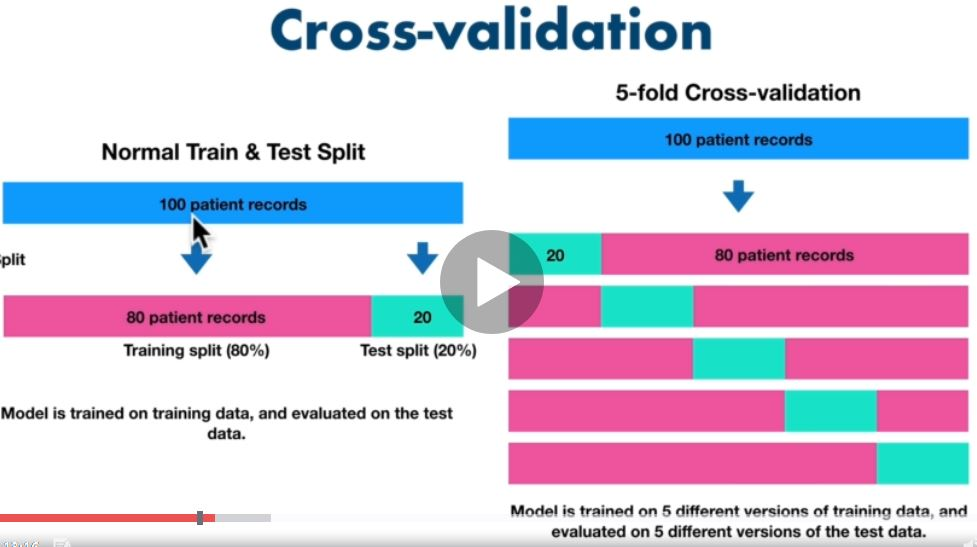

In [67]:
from IPython.display import Image
PATH = "..\\images\\"
Image(filename = PATH + "Cross_validation.JPG", width=800, height=800)


As shown in the above picture the ` cv ` stands for `cross validation` eg: `cross_val_score(forest_clf, X, y, cv=5)` the cross validation will be 5 times. It uses the 5 fold or 5 sets of Test data to test how good the model is. So in some set the model will score very good or in some it will be bad. so we should take the mean of the ` cross_val_score ` to determine the models performance.

In ` cross_val_score ` the default value of `scoring ` parameter is **None** `cross_val_score(forest_clf, X, y, cv=10, scoring=None)` it can be chnaged to different type as explained below. If the Scoring parametr is None it uses the default scoring parameter in our caes it is `Mean Accuracy`

The `scoring` parameter can take the following 

### 4.2.1 Classification model evaluation metrics ** Only for Classification Models **

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

 A) **Accuracy** The ` score() ` or ` cross_val_score() ` by default give us the Accuracy result

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.score(X_test, y_test), cross_val_score(forest_clf, X, y, cv=5, scoring=None)

(0.7868852459016393,
 array([0.81967213, 0.8852459 , 0.81967213, 0.8       , 0.75      ]))

B) **Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

**ROC curves**==> it is a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [69]:
from sklearn.metrics import roc_curve

np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

# Using Predict_proba() making the prediction probability
y_probs = forest_clf.predict_proba(X_test)
y_probs[:10]

array([[0.18, 0.82],
       [0.3 , 0.7 ],
       [0.15, 0.85],
       [0.54, 0.46],
       [0.99, 0.01],
       [0.38, 0.62],
       [0.02, 0.98],
       [0.49, 0.51],
       [0.89, 0.11],
       [0.95, 0.05]])

In [70]:
#  We need to take the y_probs positive value only... so will get it by string slicing
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.82, 0.7 , 0.85, 0.46, 0.01, 0.62, 0.98, 0.51, 0.11, 0.05])

In [71]:
fpr, tpr, threshholds = roc_curve(y_test, y_probs_positive)

In [72]:
fpr[:5]

array([0., 0., 0., 0., 0.])

In [73]:
tpr[:5]

array([0.        , 0.02777778, 0.19444444, 0.25      , 0.30555556])

In [74]:
threshholds[:5]

array([2.  , 1.  , 0.94, 0.89, 0.88])

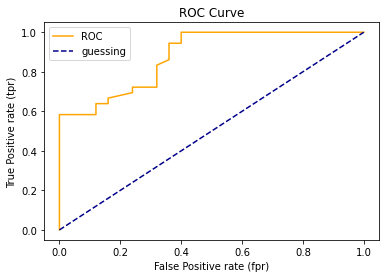

In [75]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "orange", label="ROC")
    #Plotting a dummy base curve
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="guessing")
    
    plt.xlabel("False Positive rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)    

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8794444444444445

Below is the demonstration to show how the perfect ROC curve will look like and the perfect AUC score

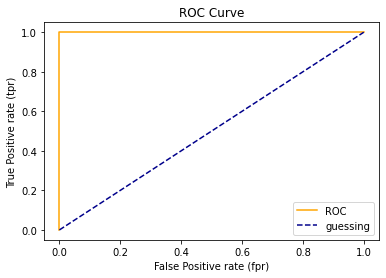

In [77]:
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [78]:
roc_auc_score(y_test, y_test)

1.0

- ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

- The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

- The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

https://www.youtube.com/watch?v=4jRBRDbJemM

C) **Confusion Matrix** ==> A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused. 

In [79]:
from sklearn.metrics import confusion_matrix

np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

# Using Predict_proba() making the prediction probability
y_pred = forest_clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[16,  9],
       [ 4, 32]], dtype=int64)

In [80]:
pd.crosstab(y_test,
           y_pred,
           rownames=["Actual Lables"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Lables,,
0,16,9
1,4,32


In the above example 16 => is the true negative, and 32 => is the True Positive

## How to install `seaborn` from within the notebook in the environment

`!`==> it tells conda to open up a bash command, or command prompt.

`--` ==> is the path

`import sys`

`!conda install --yes --prefix {sys.prefix} seaborn`

In [81]:
len(y_test), len(y_pred)

(61, 61)

<AxesSubplot:>

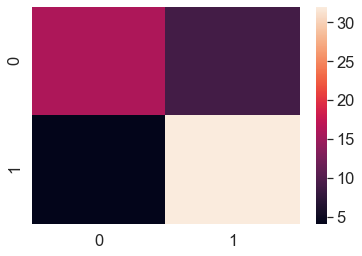

In [82]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat)

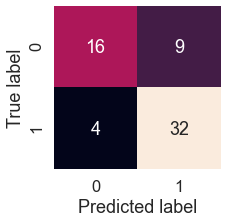

In [83]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(conf_mat)

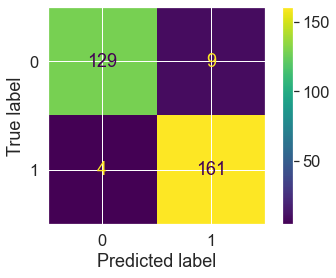

In [84]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(forest_clf, X, y)

D) **Classification Report** ==>

In [85]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71        25
           1       0.78      0.89      0.83        36

    accuracy                           0.79        61
   macro avg       0.79      0.76      0.77        61
weighted avg       0.79      0.79      0.78        61



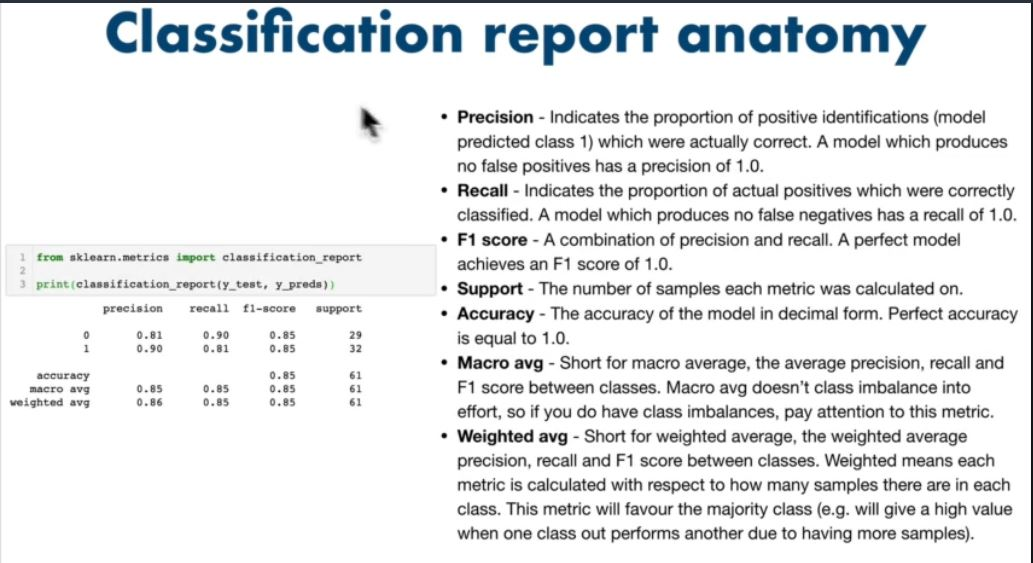

In [86]:
Image(filename = PATH + "Classification_report.JPG", width=800, height=800)

There are other various scoring parameters for Scikit learn apart from the ones mentioned above. 
[Scikit Learn Documentaion](https://scikit-learn.org/stable/modules/model_evaluation.html)

### 4.2.2 Regression model evaluation metrics ** Only for Regression Models **
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [87]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(55)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train, y_train);

In [88]:
model.score(X_test, y_test)

0.8594879517444038

In [89]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8594879517444038

the theory above of " if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1." can be proved as ............

In [90]:
y_test_mean = np.full(len(y_test), y_test.mean())

In [91]:
y_test_mean[:10]

array([23.07647059, 23.07647059, 23.07647059, 23.07647059, 23.07647059,
       23.07647059, 23.07647059, 23.07647059, 23.07647059, 23.07647059])

In [92]:
np.mean(y_test)

23.076470588235292

In [93]:
r2_score(y_test, y_test_mean)
#55-idli 73-onion

0.0

**Mean absolute Error**

MAE is the average of the aboslute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [94]:
from sklearn.metrics import mean_absolute_error

y_pred_mae = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_mae)
mae

2.2752745098039204

In [95]:
np.mean(abs(y_test - y_pred_mae))

2.2752745098039204

**Mean squared error (MSE)**

In [96]:
from sklearn.metrics import mean_squared_error

y_pred_mse = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mse)
mse

10.101057843137255

In [97]:
np.mean((y_test -  y_pred_mse)** 2)

10.101057843137255

### 4.2.3 A) Finally using the `scoring` parameter for `Classification` problems

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf =  RandomForestClassifier()

In [99]:
np.random.seed(55)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.86885246, 0.8852459 , 0.78688525, 0.81666667, 0.75      ])

In [100]:
np.mean(cv_acc)

0.8215300546448088

In [101]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8199224305106657

In [102]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8363636363636363

In [103]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8300056561085973

### 4.2.3 B) Using the `scoring` parameter for `Regression` problems

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [105]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [106]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [107]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae


array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [108]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.12863512415064

### 4.3 Using different evalution metrics as Scikit-Learn functions for both Regression and Classification problems

**Classification Evaluation Functions**

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("*************Classifier metrics on the test set**********************")
print(f"Accuracy Score   : {accuracy_score(y_test, y_preds)*100:2f}%")
print(f"Precission Score : {precision_score(y_test, y_preds)*100:2f}%")
print(f"Recall Score     : {recall_score(y_test, y_preds)*100:2f}%")
print(f"F1 Score         : {f1_score(y_test, y_preds)*100:2f}%")

*************Classifier metrics on the test set**********************
Accuracy Score   : 78.688525%
Precission Score : 78.048780%
Recall Score     : 88.888889%
F1 Score         : 83.116883%


In [110]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(55)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("*************Regression model metrics on the test set****************")
print(f"R^2 Score                   : {r2_score(y_test, y_preds)*100:2f}%")
print(f"Mean absolute Error(MAE)    : {mean_absolute_error(y_test, y_preds)}")
print(f"Mean Squareroot Error (MSE) : {mean_squared_error(y_test, y_preds)}")

*************Regression model metrics on the test set****************
R^2 Score                   : 85.948795%
Mean absolute Error(MAE)    : 2.2752745098039204
Mean Squareroot Error (MSE) : 10.101057843137255


In [111]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5. Improving a model 

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tunning Hyperparameters by hand

In case of improving a model the concept of `Validation Set` came into picture.
We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

We are using the `train_test_split()` function **twice** to create the training, validataion and testing group.

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_preds(y_true, y_preds, txt):
    accuracy = accuracy_score(y_true, y_preds)
    precession = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
        "Accuracy": round(accuracy, 2),
        "Precision": round(precession, 2),
        "Recall": round(recall, 2),
        "F1": round(f1,2)
    }
    print(f"The {txt} score is: ************")
    print(f"The Accuracy Score is     : {accuracy * 100:.2f}%")
    print(f"The Precision Score is    : {precession * 100:.2f}%")
    print(f"The recall score is       : {recall * 100:.2f}%")
    print(f"The f1 score is           : {f1 * 100:.2f}%")
    
    return metric_dict

In [113]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(55)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# creating the test group of 15% size
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.15)
# creating the validataion group of 15% size and 70% with 
X_train, X_valid, y_train, y_valid = train_test_split(X_rem, y_rem, test_size=0.15)

len(X), len(X_train), len(X_test), len(X_valid)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_classification_preds(y_valid, y_preds, "Baseline")

The Baseline score is: ************
The Accuracy Score is     : 84.62%
The Precision Score is    : 90.00%
The recall score is       : 81.82%
The f1 score is           : 85.71%


In [114]:
baseline_metrics

{'Accuracy': 0.85, 'Precision': 0.9, 'Recall': 0.82, 'F1': 0.86}

In [115]:
from sklearn.model_selection import RandomizedSearchCV

#Thsi is the dictionary we are creating on which we will be doing the search
grid = {
    "n_estimators": [100, 150, 200, 250, 300, 500, ],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4, 6, 8]
}

np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# n_jobs stand for machine or system to be allocated
clf = RandomForestClassifier(n_jobs=1) 

rs_clf = RandomizedSearchCV(estimator=clf,  # Which model to be used, the one we have instantiated
                           param_distributions=grid, #the grid variable for hyperparameter
                           n_iter=25, #number of iterataions to do
                           cv=5, #Cross validations 
                           verbose=2) #for the log

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.4s
[CV] n_estimators=150, min_samples_split=4, min_samples_leaf=8, max_features=auto, max_depth=20 
[CV]  n_estimators=150, min_samples_split=4, min_samples_leaf=8, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=150, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=500, min_samples_split=2, min_

[CV]  n_estimators=150, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.2s
[CV] n_estimators=150, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=150, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.2s
[CV] n_estimators=150, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=150, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.2s
[CV] n_estimators=150, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=150, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=20 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=6, max_features=auto, max_depth=20, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   35.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=25,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 500]},
                   verbose=2)

In [116]:
# This tells us the best params for our model.
rs_clf.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5}

once we use the `RandomizedSearchCV` the best hyper parameters get automatically assigned to it, we dont have to manually assign it again.

We can use it directly for any predictions

In [117]:
#making the prediction with the RandomizedSerachCV object of RandomForestClassifier
rs_y_preds = rs_clf.predict(X_test)

#chceking the score
rs_metrics = evaluate_classification_preds(y_test, rs_y_preds, "RandomizedSerachCV")
rs_metrics

The RandomizedSerachCV score is: ************
The Accuracy Score is     : 81.97%
The Precision Score is    : 80.49%
The recall score is       : 91.67%
The f1 score is           : 85.71%


{'Accuracy': 0.82, 'Precision': 0.8, 'Recall': 0.92, 'F1': 0.86}

In [118]:
baseline_metrics

{'Accuracy': 0.85, 'Precision': 0.9, 'Recall': 0.82, 'F1': 0.86}

### 5.3 Hyperparameter tuning with GridSearchCV

The main difference between `RandomizedSearchCV` and `GridSearchCV` is that the GridSearchCV dont have the parameter as n_iter. It don't do it in a random manner. it just do the exact number of combinations it has in the grid or Hyperparameters...

So we prepare a new grid, by seeing the values of the old `rs_clf.best_params_` and keep the values close to the dataset.

In [119]:
rs_clf.best_params_

{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5}

In [120]:
grid

{'n_estimators': [100, 150, 200, 250, 300, 500],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4, 6, 8]}

In [121]:
grid2 = {
 'n_estimators': [250, 280],
 'max_depth': [5, 6, 7],
 'max_features': ['auto'],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1]
}

In [122]:
from sklearn.model_selection import GridSearchCV

np.random.seed(55)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# n_jobs stand for machine or system to be allocated
clf = RandomForestClassifier(n_jobs=1) 

gs_clf = GridSearchCV(estimator = clf,  # Which model to be used, the one we have instantiated
                      param_grid = grid2, #the grid variable for hyperparameter
                      cv = 5, #Cross validations 
                      verbose = 2) #for the log

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=280 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=280, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250 
[CV]  max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250 
[CV]  max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250 
[CV]  max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=250, total=   0.3s
[CV] max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=280 
[CV]  max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=280, total=   0.3s
[CV] max_depth=7, max_features=auto, min_samples_leaf=1, min_

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   18.8s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [5, 6, 7], 'max_features': ['auto'],
                         'min_samples_leaf': [1], 'min_samples_split': [2, 3],
                         'n_estimators': [250, 280]},
             verbose=2)

In [123]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 280}

In [124]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_classification_preds(y_test, gs_y_preds, "GridSearchCV")
gs_metrics

The GridSearchCV score is: ************
The Accuracy Score is     : 80.33%
The Precision Score is    : 80.00%
The recall score is       : 88.89%
The f1 score is           : 84.21%


{'Accuracy': 0.8, 'Precision': 0.8, 'Recall': 0.89, 'F1': 0.84}

#### We will now comapare our metrics of the models we have worked upon with Hyperparameters

this was one of the reason why we were returning the dictionary object for all this comparison

In [125]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "Randomized Search": rs_metrics,
                               "Grid Search": gs_metrics}
                              )
compare_metrics

,baseline,Randomized Search,Grid Search
Accuracy,0.85,0.82,0.80
Precision,0.90,0.80,0.80
Recall,0.82,0.92,0.89
F1,0.86,0.86,0.84


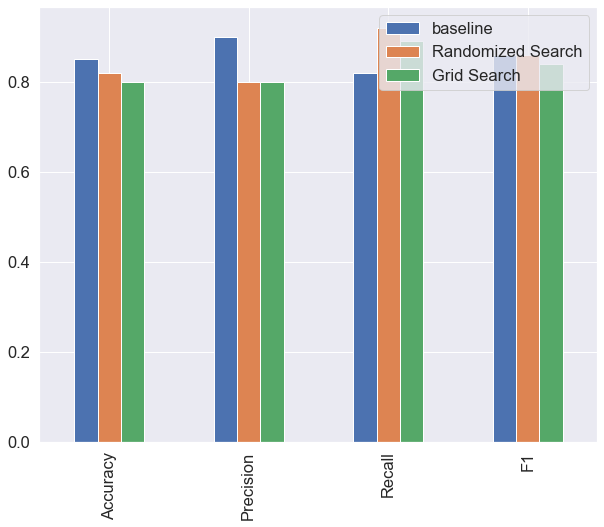

In [126]:
compare_metrics.plot.bar(figsize=(10, 8));

## Note:
If we want to compare two models performance with respect to tunning its Hyperparameters we should not split the data into X and y set multiple times agiana nd again... As because whenever we split it multiple times the train and the test data changes, so the different result sets give different values and can't be compared in true sense.

In the above examples for the practise part we did multiple times the split of the data in Train and Testing set.
This is a very good read for metrics comparison: https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m


## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Note:**  When to use `joblib` and when to use `pickle` ??.. When the size of the fitted model which we are trying to import is huge, we should use the  `joblib`

**Pickle**

In [127]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("..\Models\gs_random_random_forest_model.pkl", "wb")) #wb stands for write binary

In [128]:
# Load a saved model
loaded_pickle_model = pickle.load(open("..\Models\gs_random_random_forest_model.pkl", "rb")) #rb for read binary

In [129]:
# Make some predictions with the loaded model and verify the score
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_classification_preds(y_test, pickle_y_preds, "Loading and Saving a Model")

The Loading and Saving a Model score is: ************
The Accuracy Score is     : 80.33%
The Precision Score is    : 80.00%
The recall score is       : 88.89%
The f1 score is           : 84.21%


{'Accuracy': 0.8, 'Precision': 0.8, 'Recall': 0.89, 'F1': 0.84}

**Joblib**

In [130]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="..\Models\gs_random_random_forest_model_1.joblib")

['..\\Models\\gs_random_random_forest_model_1.joblib']

In [131]:
# Import a saved joblib model
loaded_joblib_model = load(filename="..\Models\gs_random_random_forest_model_1.joblib")

In [132]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_classification_preds(y_test, joblib_y_preds, "joblib")

The joblib score is: ************
The Accuracy Score is     : 80.33%
The Precision Score is    : 80.00%
The recall score is       : 88.89%
The f1 score is           : 84.21%


{'Accuracy': 0.8, 'Precision': 0.8, 'Recall': 0.89, 'F1': 0.84}